In [1]:
from sklearn.svm import SVC
SVC()

SVC()

__SVC(
    *,
    C=1.0,
    kernel='rbf',
    degree=3,
    gamma='scale',
    coef0=0.0,
    shrinking=True,
    probability=False,
    tol=0.001,
    cache_size=200,
    class_weight=None,
    verbose=False,
    max_iter=-1,
    decision_function_shape='ovr',
    break_ties=False,
    random_state=None,
)__

__Support Vector Machine(SVM)__ is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.

The __SVM kernel__ is a function that takes low dimensional input space and transforms it into higher-dimensional space, ie it converts not separable problem to separable problem. It is mostly useful in non-linear separation problems. Simply put the kernel, it does some extremely complex data transformations then finds out the process to separate the data based on the labels or outputs defined.

In [2]:
dir(SVC)

['__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_n_features',
 '_check_proba',
 '_compute_kernel',
 '_decision_function',
 '_dense_decision_function',
 '_dense_fit',
 '_dense_predict',
 '_dense_predict_proba',
 '_estimator_type',
 '_get_coef',
 '_get_param_names',
 '_get_tags',
 '_impl',
 '_more_tags',
 '_pairwise',
 '_predict_log_proba',
 '_predict_proba',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sparse_decision_function',
 '_sparse_fit',
 '_sparse_kernels',
 '_sparse_predict',
 '_sparse_predict_proba',
 '_validate_data',
 '_validate_for_predict',
 '_validate_targets',


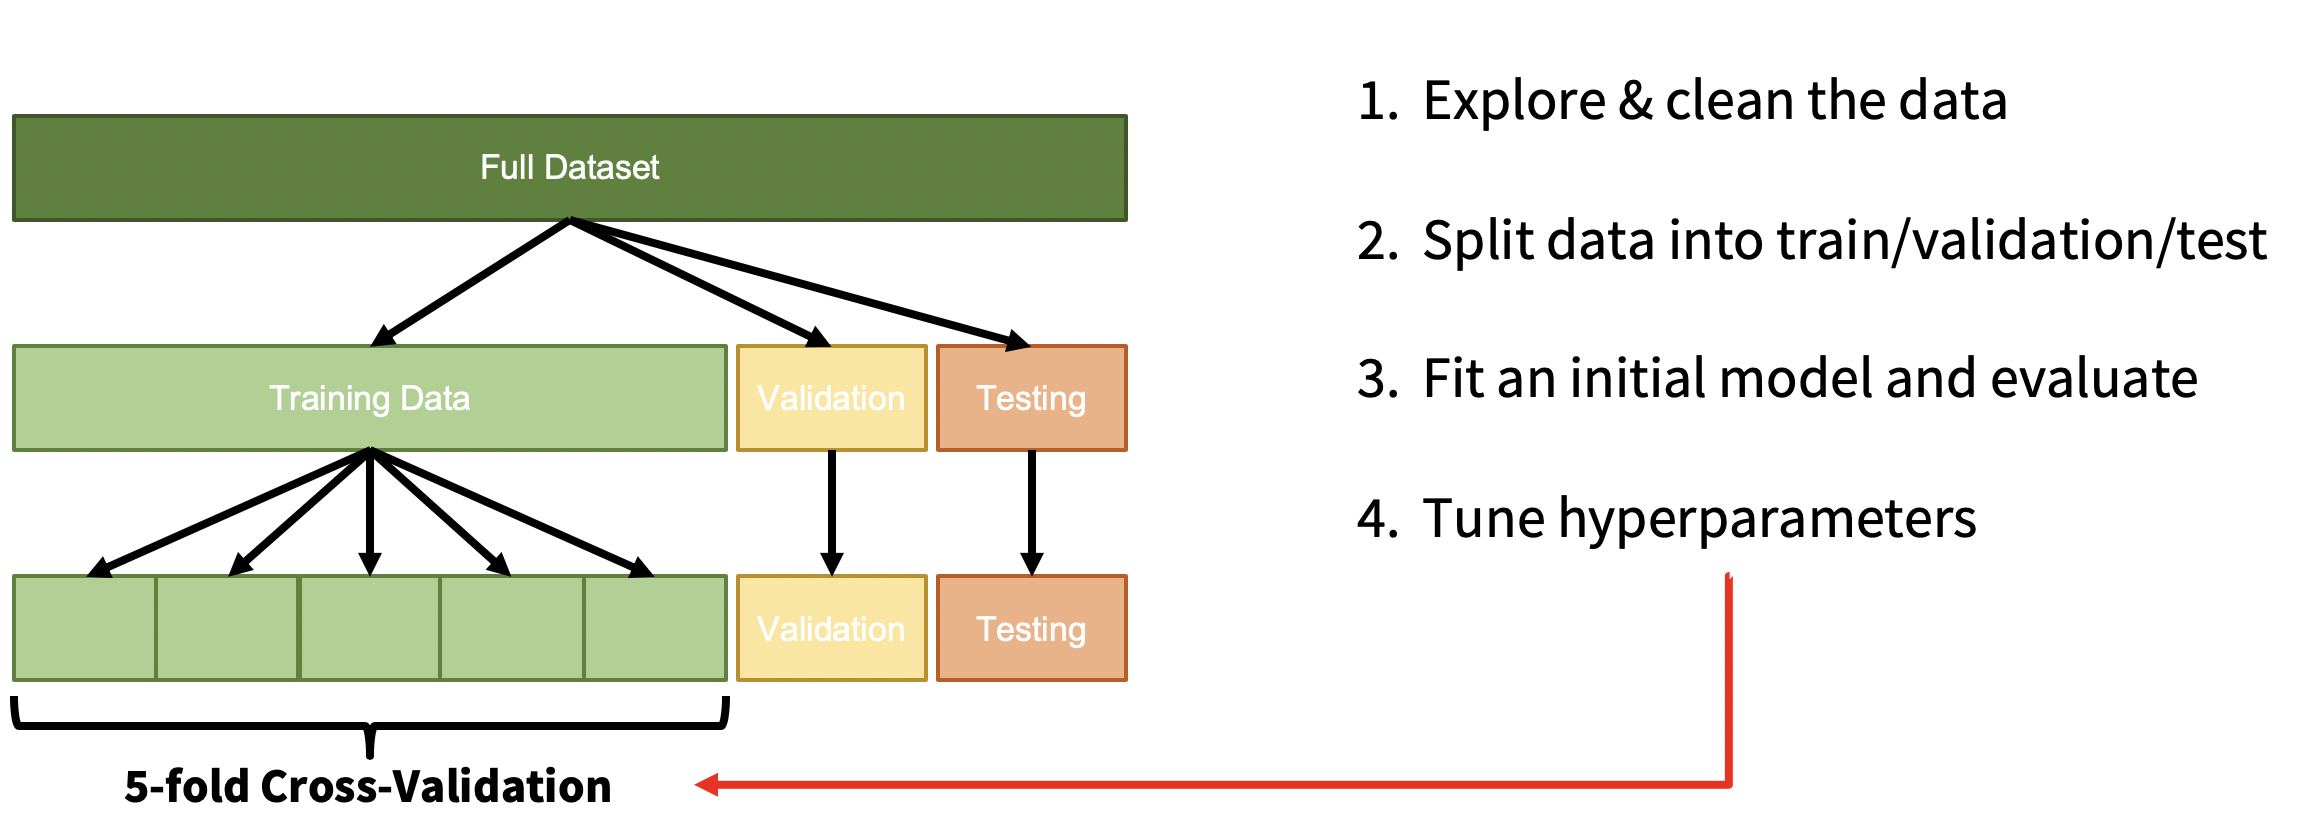
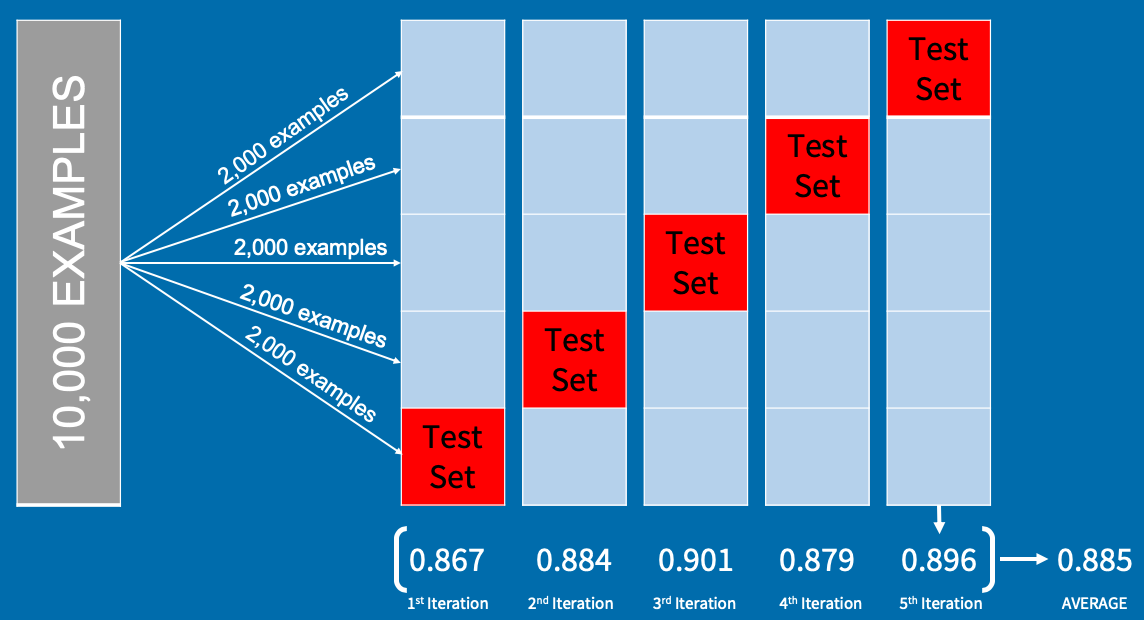
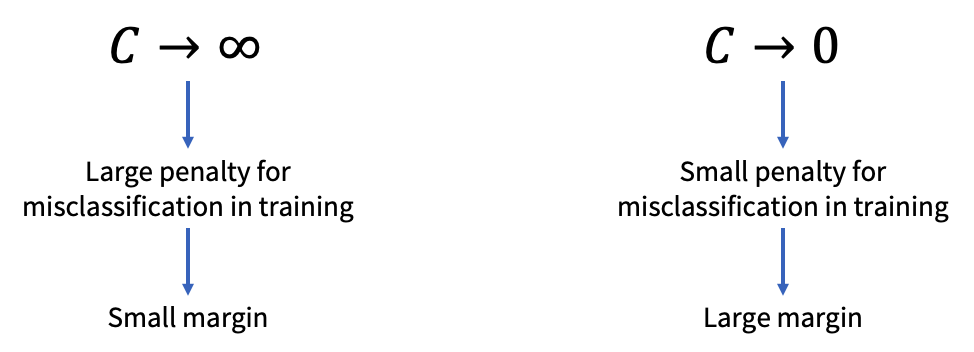

In [4]:
import joblib 
import pandas as pd
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)
tr_features= pd.read_csv('/ML/Applied ML Algorithms/L1/train_features.csv')
tr_labels=pd.read_csv('/ML/Applied ML Algorithms/L1/train_label.csv')
tr_labels.head(5)

,Survived
0,1
1,0
2,1
3,0
4,1


In [5]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [10]:
svc = SVC()
parameters = {
    'kernel':['linear', 'rbf'],
    'C':[0.1, 1, 10]
}
cv = GridSearchCV(svc, parameters, cv=5)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.1, 'kernel': 'linear'}

0.796 (+/-0.115) for {'C': 0.1, 'kernel': 'linear'}
0.654 (+/-0.06) for {'C': 0.1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 1, 'kernel': 'linear'}
0.661 (+/-0.048) for {'C': 1, 'kernel': 'rbf'}
0.796 (+/-0.115) for {'C': 10, 'kernel': 'linear'}
0.684 (+/-0.07) for {'C': 10, 'kernel': 'rbf'}


 one thing to notice is that our C hyper parameter is not really having any impact on the accuracy for the linear kernel. In addition to that, the linear kernel is doing drastically better than the RBF kernel. So that suggests that our data is actually linearly separable.

In [13]:
cv.best_estimator_

SVC(C=0.1, kernel='linear')

In [14]:
joblib.dump(cv.best_estimator_, '/ML/Applied ML Algorithms/Models/SVM_model.pkl')

['/ML/Applied ML Algorithms/Models/SVM_model.pkl']